In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier

#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

C:\Users\raymo\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_excel("data/train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [4]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD       4667
GNDR           0
OWNHOME        0
SPORT       4943
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [5]:
df = df.drop('CHILD', axis=1)
df = df.drop('SPORT', axis=1)
df = df.drop('COMP', axis=1)
df1 = df.drop('FAKEID', axis=1)

In [6]:
df1['AGE'] = pd.to_numeric(df1['AGE'], errors='coerce')
df1['INCOME'] = pd.to_numeric(df1['INCOME'], errors='coerce')
df1['GNDR'] = pd.to_numeric(df1['GNDR'], errors='coerce')
df1['OWNHOME'] = pd.to_numeric(df1['OWNHOME'], errors='coerce')

In [7]:
df1.isnull().sum()

Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
GNDR         498
OWNHOME     1999
PCTMARR        0
HOMEVAL        0
dtype: int64

In [8]:
age = df1['AGE'].median()
income = df1['INCOME'].median()

In [9]:
df1.GNDR.fillna(2, inplace=True)
df1.OWNHOME.fillna(2, inplace=True)
df1.AGE.fillna(age, inplace=True)
df1.INCOME.fillna(income, inplace=True)

In [10]:
df1.head()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,1.0,77,203
1,1,0,0,1,0,1,15,3,1,63.0,3.0,0.0,0.0,53,68
2,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,1.0,50,38
3,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,1.0,60,68
4,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,1.0,65,194


In [11]:
df1.isnull().sum()

Y2defect    0
Y1G5        0
Y1G4        0
Y1G3        0
Y1G2        0
Y1G1        0
Y1price     0
YEARS       0
BACKER      0
AGE         0
INCOME      0
GNDR        0
OWNHOME     0
PCTMARR     0
HOMEVAL     0
dtype: int64

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 15 columns):
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null float64
INCOME      9216 non-null float64
GNDR        9216 non-null float64
OWNHOME     9216 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(4), int64(11)
memory usage: 1.1 MB


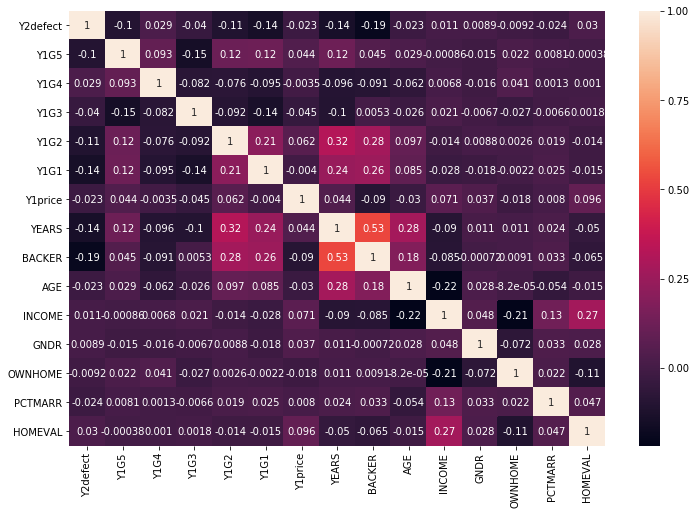

In [13]:
# correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True)

## Model Developement

In [14]:
# declare X variables and y variable
y = df1['Y2defect']
X = df1[['BACKER', 'YEARS', 'Y1G1', 'Y1G2']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.619305856833
[[335 119]
 [232 236]]
             precision    recall  f1-score   support

          0       0.59      0.74      0.66       454
          1       0.66      0.50      0.57       468

avg / total       0.63      0.62      0.61       922

0.621079483414


##### This model is 62.1% accurate

## Model Deployment & Prepare Entry Data

In [16]:
df2 = pd.read_excel("data/validation_dataset.xlsx")
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 19 columns):
FAKEID      9542 non-null object
Y3defect    0 non-null float64
Y2G5        9542 non-null int64
Y2G4        9542 non-null int64
Y2G3        9542 non-null int64
Y2G2        9542 non-null int64
Y2G1        9542 non-null int64
Y2price     9542 non-null int64
YEARS       9542 non-null int64
BACKER      9542 non-null int64
AGE         7055 non-null float64
INCOME      9542 non-null object
CHILD       4810 non-null object
GNDR        9542 non-null object
OWNHOME     9542 non-null object
SPORT       4180 non-null float64
COMP        9542 non-null object
PCTMARR     9542 non-null int64
HOMEVAL     9542 non-null int64
dtypes: float64(3), int64(10), object(6)
memory usage: 1.4+ MB


In [18]:
df2.isnull().sum()

FAKEID         0
Y3defect    9542
Y2G5           0
Y2G4           0
Y2G3           0
Y2G2           0
Y2G1           0
Y2price        0
YEARS          0
BACKER         0
AGE         2487
INCOME         0
CHILD       4732
GNDR           0
OWNHOME        0
SPORT       5362
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [19]:
df2 = df2.drop('CHILD', axis=1)
df2 = df2.drop('SPORT', axis=1)
df3 = df2.drop('COMP', axis=1)

In [20]:
df3['AGE'] = pd.to_numeric(df3['AGE'], errors='coerce')
df3['INCOME'] = pd.to_numeric(df3['INCOME'], errors='coerce')
df3['GNDR'] = pd.to_numeric(df3['GNDR'], errors='coerce')
df3['OWNHOME'] = pd.to_numeric(df3['OWNHOME'], errors='coerce')

In [21]:
age = df3['AGE'].median()
income = df3['INCOME'].median()
df3.GNDR.fillna(2, inplace=True)
df3.OWNHOME.fillna(2, inplace=True)
df3.AGE.fillna(age, inplace=True)
df3.INCOME.fillna(income, inplace=True)

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 16 columns):
FAKEID      9542 non-null object
Y3defect    0 non-null float64
Y2G5        9542 non-null int64
Y2G4        9542 non-null int64
Y2G3        9542 non-null int64
Y2G2        9542 non-null int64
Y2G1        9542 non-null int64
Y2price     9542 non-null int64
YEARS       9542 non-null int64
BACKER      9542 non-null int64
AGE         9542 non-null float64
INCOME      9542 non-null float64
GNDR        9542 non-null float64
OWNHOME     9542 non-null float64
PCTMARR     9542 non-null int64
HOMEVAL     9542 non-null int64
dtypes: float64(5), int64(10), object(1)
memory usage: 1.2+ MB


In [23]:
validation = df3[['BACKER', 'YEARS', 'Y2G1', 'Y2G2']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 4 columns):
BACKER    9542 non-null int64
YEARS     9542 non-null int64
Y2G1      9542 non-null int64
Y2G2      9542 non-null int64
dtypes: int64(4)
memory usage: 298.3 KB


In [24]:
df3.isnull().sum()

FAKEID         0
Y3defect    9542
Y2G5           0
Y2G4           0
Y2G3           0
Y2G2           0
Y2G1           0
Y2price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
GNDR           0
OWNHOME        0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [25]:
fakeid = pd.DataFrame(df3['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [26]:
output = dt.predict(validation)

In [27]:
probdef = dt.predict_proba(validation)
probdef = pd.DataFrame(probdef, columns=['Probability of Renewal', 'Probability of Defect'])

In [28]:
deffans = fakeid.join(probdef)

In [29]:
predicted_y = pd.DataFrame(output, columns=['Predicted Defect'])
deffans = deffans.join(predicted_y)
deffans.head()

,FAKEID,Probability of Renewal,Probability of Defect,Predicted Defect
0,580D24RR,0.531250,0.468750,0
1,179Q96NO,0.606250,0.393750,0
2,050Z45TB,0.526316,0.473684,0
3,399V18KY,0.014423,0.985577,1
4,009A52KP,0.543478,0.456522,0


In [30]:
# generating submission file
deffans.to_csv("data/submissionentry.csv", index=False)